In [10]:
# Sam Brown
# sam_brown@mines.edu
# Date 06/02\2025
# Goal: Explore/ confirm whether there is a connection between the days since the last event and the slippage size

# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

from sklearn.linear_model import LinearRegression

import my_lib.funcs

# USER DEFINED PATHS TO EVENTS 
evts_path0 = "/Users/sambrown04/Documents/SURF/Events/2010_2010Events2stas"
evts_path1 = "/Users/sambrown04/Documents/SURF/Events/2011_2011Events2stas"
evts_path2 = "/Users/sambrown04/Documents/SURF/Events/2012_2012Events2stas"
evts_path3 = "/Users/sambrown04/Documents/SURF/Events/2013_2013Events2stas"
evts_path4 = "/Users/sambrown04/Documents/SURF/Events/2014_2014Events2stas"
evts_path5 = "/Users/sambrown04/Documents/SURF/Events/2015_2015Events2stas"

paths = [evts_path0, evts_path1, evts_path2, evts_path3, evts_path4, evts_path5]

In [12]:
# load events
events_list2010 = my_lib.funcs.load_evt(evts_path0)
events_list2011 = my_lib.funcs.load_evt(evts_path1)
events_list2012 = my_lib.funcs.load_evt(evts_path2)
events_list2013 = my_lib.funcs.load_evt(evts_path3)
events_list2014 = my_lib.funcs.load_evt(evts_path4)
events_list2015 = my_lib.funcs.load_evt(evts_path5)

year_data = [events_list2010, events_list2011, events_list2012, events_list2013, events_list2014, events_list2015]

In [14]:
def time_size_year(events_list):
    """
    Process data to be conducive to analysis between the time since the event and the total delta. For all events in the year, 
    calculate the time since the last event and the average total delta for an event.

    Parameters
    ----------
    events_list: list of pd.DataFrames

    Returns
    -------
    n_df: pd.DataFrame:
        columns = ['Time', 'mins_since', 'event_num', 'avg_delta']
    """
    
    
    start_times = []
    for event in events_list:
        start_times.append(event['time'][0])

    n_df = pd.DataFrame(columns = ['Time', 'event_num', 'mins_since', 'avg_delta'])
    n_df['Time'] = start_times
    n_df['event_num'] = None
    n_df['mins_since'] = None
    n_df['avg_delta'] = None

    n_df['event_num'] = n_df.reset_index().index

    # Sort events to calculate time since last event.
    n_df['Time'] = pd.to_datetime(n_df['Time'], errors='coerce')
    n_df = n_df.sort_values('Time')
    
    n_df['mins_since'] = n_df['Time'].diff().dt.total_seconds() / 60

    n_df = n_df.reset_index(drop = True)

    feat = my_lib.funcs.extract_event_features(events_list)
    
    slip_averages = []
    for event in feat:
        slip_averages.append(event['total_delta'].mean())

    for idx,row in n_df.iterrows():
        # print(idx, row)
        n_df.at[idx, 'avg_delta'] = slip_averages[n_df.at[idx, 'event_num']]

    y_mins = n_df['mins_since'][1:]
    x_delta = n_df['avg_delta'][1:]
    
    # Plot
    plt.style.use('_mpl-gallery')
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.scatter(x_delta, y_mins, s = 15)
    ax.set_xlabel("Average Delta for Event")
    ax.set_ylabel("Minutes Since Last Slip Event")
    plt.show()


    # Fit Slope
    reg = LinearRegression().fit(x_delta.values.reshape(-1, 1), y_mins.values.reshape(-1, 1)) # Had to reshape out of Series
    return (f'Coef: {reg.coef_}, intercept: {reg.intercept_}')

    # return n_df
    


    

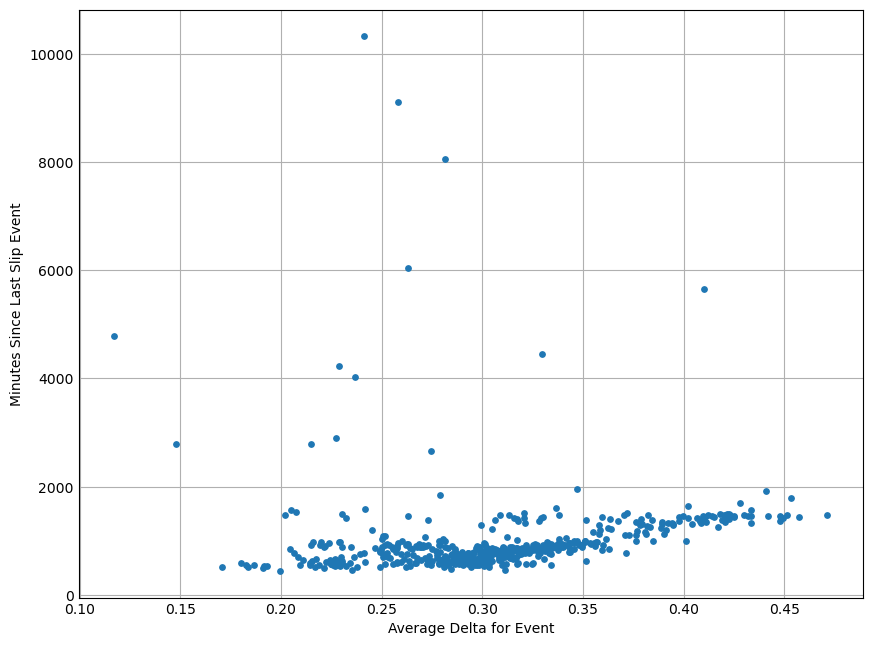

Coef: [[1642.8214965]], intercept: [491.26086082]


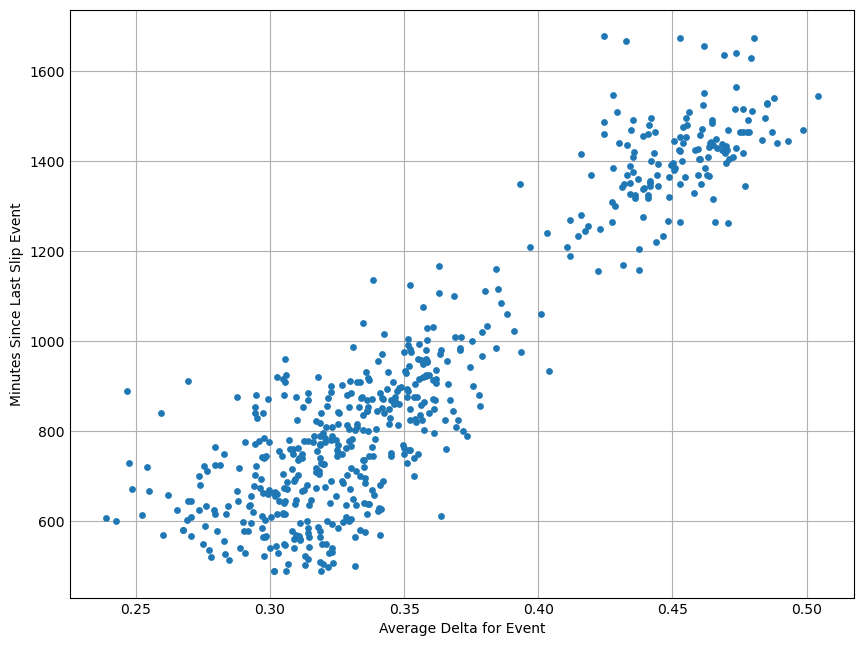

Coef: [[4672.33252319]], intercept: [-740.14182708]


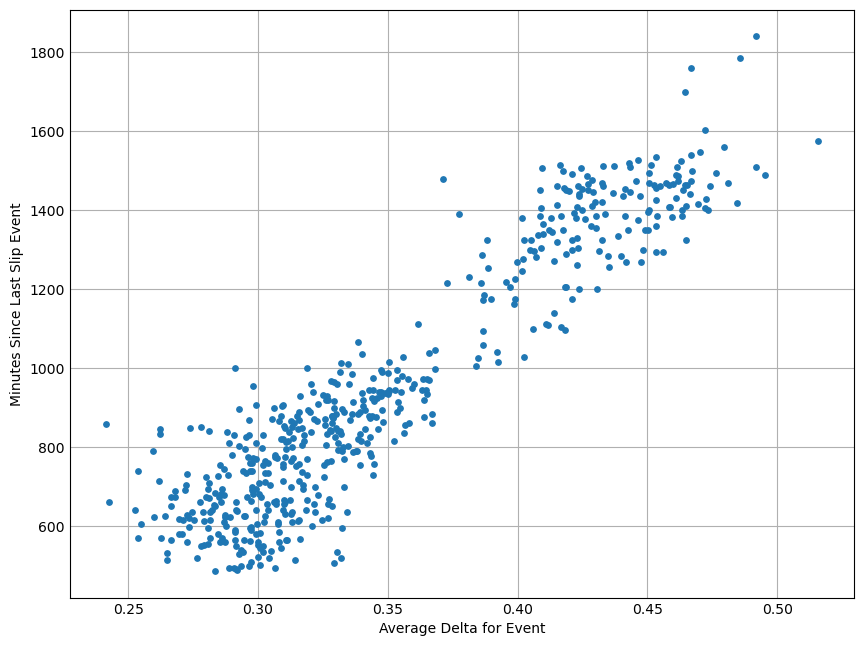

Coef: [[4797.46714184]], intercept: [-728.28867145]


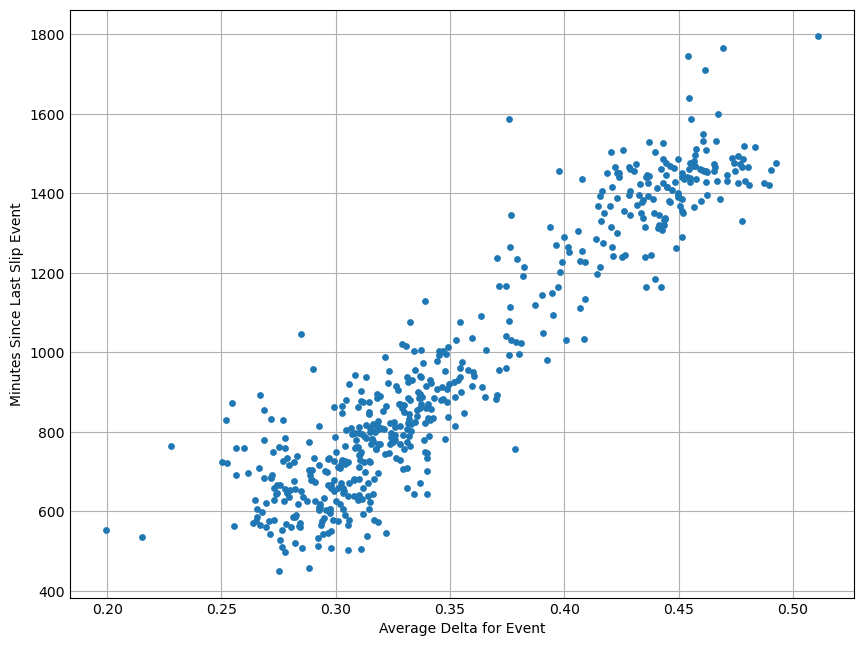

Coef: [[4579.08494011]], intercept: [-650.72256525]


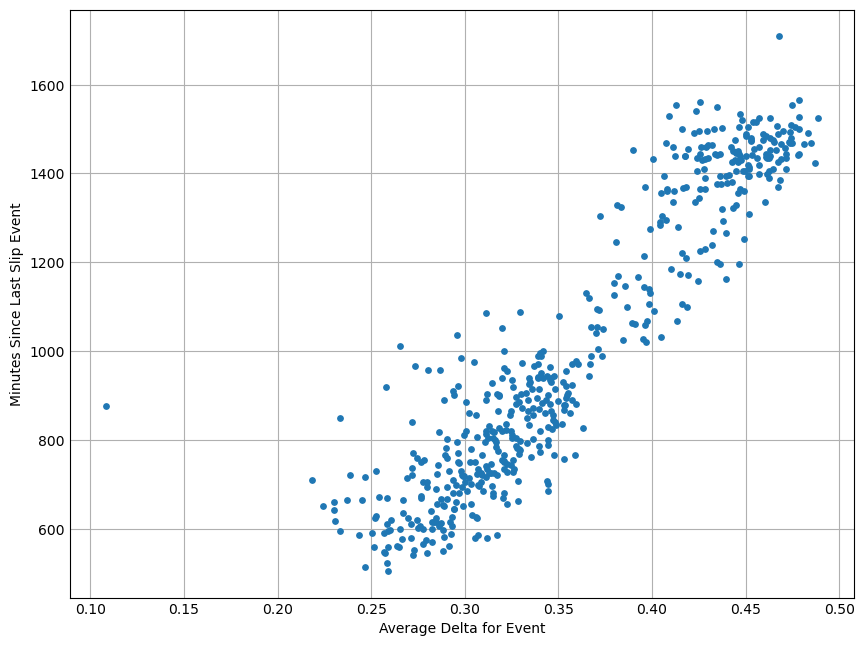

Coef: [[4251.45200553]], intercept: [-512.78429276]


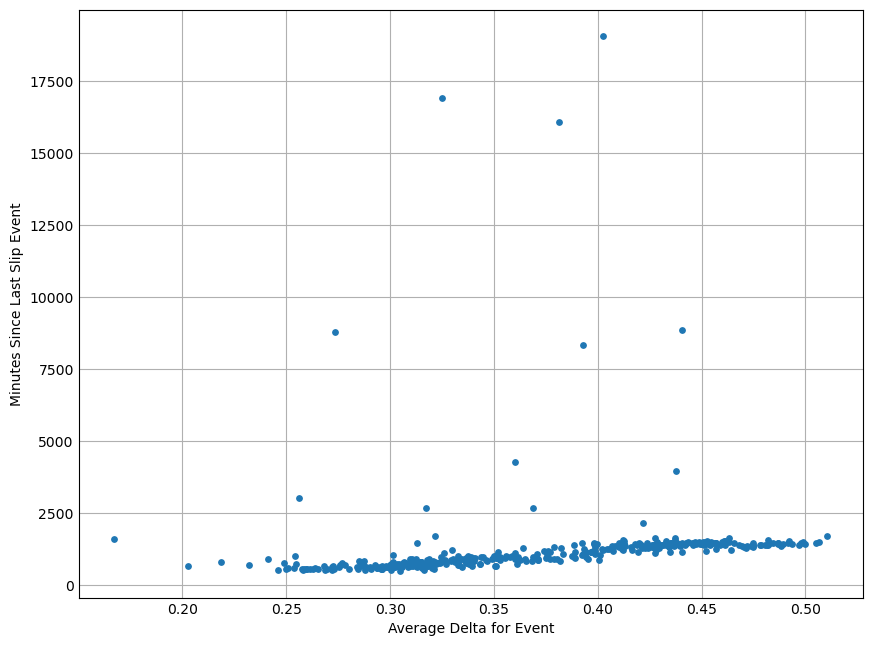

Coef: [[4033.50693836]], intercept: [-234.15232337]


In [16]:


for year in year_data:
    
    print(time_size_year(year))

In [ ]:
# 2010 and 2015 seem to be outliers. Could be something to do with the different stations operational. 